In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [3]:
df = pd.read_csv("2020_Fuel_Consumption.csv")

df.head

<bound method NDFrame.head of      MODELYEAR   MAKE              MODEL   VEHICLECLASS  ENGINESIZE  \
0         2020  Acura                ILX        Compact         2.4   
1         2020  Acura         MDX SH-AWD     SUV: Small         3.5   
2         2020  Acura  MDX SH-AWD A-SPEC     SUV: Small         3.5   
3         2020  Acura     MDX Hybrid AWD     SUV: Small         3.0   
4         2020  Acura            RDX AWD     SUV: Small         2.0   
..         ...    ...                ...            ...         ...   
877       2020  Volvo        XC40 T5 AWD     SUV: Small         2.0   
878       2020  Volvo        XC60 T5 AWD     SUV: Small         2.0   
879       2020  Volvo        XC60 T6 AWD     SUV: Small         2.0   
880       2020  Volvo        XC90 T5 AWD  SUV: Standard         2.0   
881       2020  Volvo        XC90 T6 AWD  SUV: Standard         2.0   

     CYLINDERS TRANSMISSIONS FUELTYPE  FUELCONSUMPTION_CITY  \
0            4           AM8        Z                 

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2RATING,SMOGRATING
count,882.0,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,2020.0,3.162698,5.655329,12.345918,9.069501,10.870522,27.739229,252.238095,4.546485,4.511338
std,0.0,1.359793,1.903823,3.387372,2.109384,2.773110,7.608021,59.546603,1.716778,1.748807
min,2020.0,1.000000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000,1.000000,1.000000
25%,2020.0,2.000000,4.000000,10.000000,7.600000,9.000000,23.000000,210.000000,3.000000,3.000000
50%,2020.0,3.000000,6.000000,12.000000,8.800000,10.600000,27.000000,250.000000,4.000000,5.000000
75%,2020.0,3.800000,6.000000,14.375000,10.300000,12.475000,31.000000,290.000000,5.000000,6.000000
max,2020.0,8.000000,16.000000,26.800000,18.100000,22.200000,69.000000,522.000000,10.000000,7.000000


In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(15)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,199
1,3.5,6,10.9,254
2,3.5,6,11.0,258
3,3.0,6,9.0,210
4,2.0,4,9.9,232
5,2.0,4,10.3,241
6,3.5,6,8.4,196
7,2.4,4,8.9,209
8,3.5,6,9.8,228
9,3.5,6,10.3,240


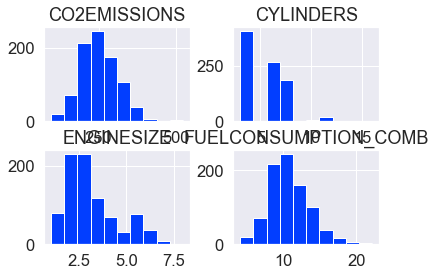

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

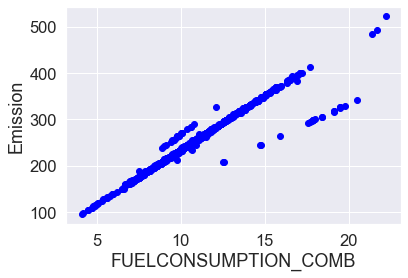

In [7]:
cdf = df[['AMOUNT', 'PERCENTAGE_OF_AMOUNT','CASES','TOTAL_AMOUNT','TOTAL_CASES']]

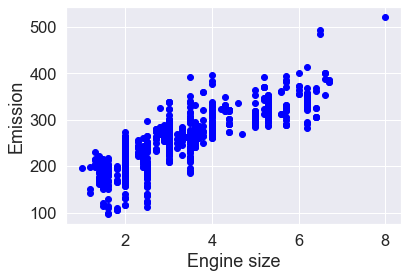

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.68404732]]
Intercept:  [136.27538818]


Text(0, 0.5, 'Emission')

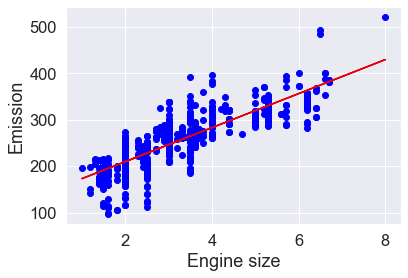

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 22.33
Residual sum of squares (MSE): 834.49
R2-score: 0.70


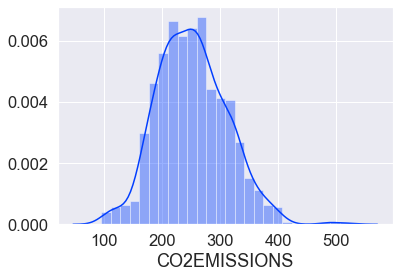

In [15]:
sns.distplot(df['CO2EMISSIONS'])

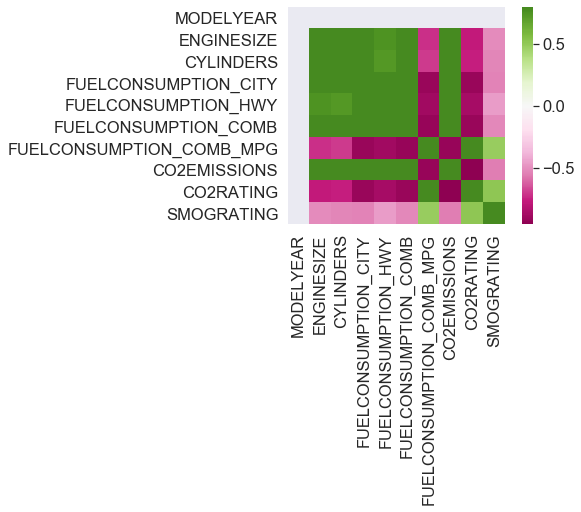

In [16]:
corrmat = df.corr()
sns.color_palette("Paired")
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0)

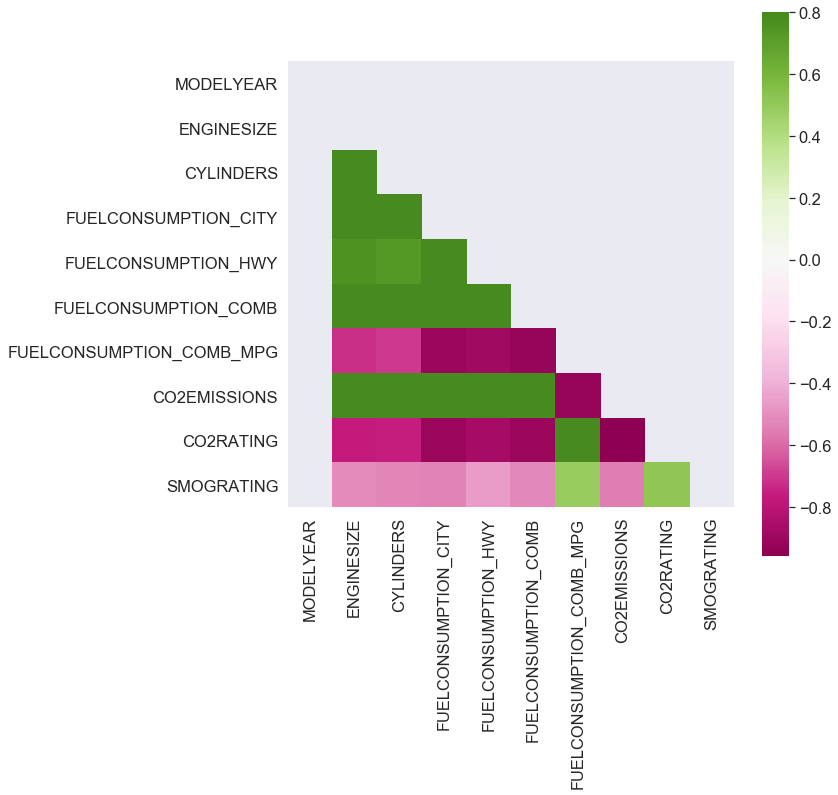

In [19]:
corrmat = df.corr()
mask= np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #np.triu_indice()는 행렬의 상단 삼각형을 반환시킴
plt.figure(figsize= (10,10))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0, mask = mask)

In [35]:
kcj_df = df[df['MAKE'].str.contains('Ram|Dodge|Ford')]
kcj_df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSIONS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2RATING,SMOGRATING
246,2020,Dodge,Challenger,Mid-size,3.6,6,A8,X,12.4,7.8,10.3,27,242,5,3
247,2020,Dodge,Challenger (MDS),Mid-size,5.7,8,A8,X,14.7,9.4,12.3,23,289,3,3
248,2020,Dodge,Challenger,Mid-size,5.7,8,M6,Z,15.6,10.1,13.1,22,307,3,1
249,2020,Dodge,Challenger (MDS),Mid-size,6.4,8,A8,Z,15.8,9.6,13.0,22,305,3,1
250,2020,Dodge,Challenger,Mid-size,6.4,8,M6,Z,16.7,10.4,13.9,20,325,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2020,Ram,1500 Classic,Pickup truck: Standard,3.6,6,A8,X,13.9,9.6,11.9,24,280,4,3
778,2020,Ram,1500 Classic,Pickup truck: Standard,5.7,8,A8,X,15.7,11.0,13.6,21,319,3,3
779,2020,Ram,1500 Classic 4X4,Pickup truck: Standard,3.6,6,A8,X,14.5,10.2,12.6,22,294,3,3
780,2020,Ram,1500 Classic 4X4,Pickup truck: Standard,5.7,8,A8,X,16.2,11.6,14.1,20,330,3,3


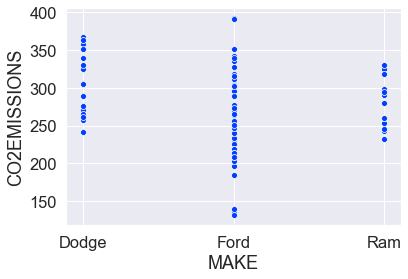

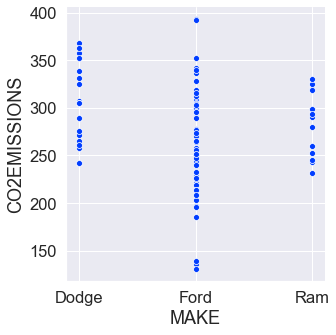

In [36]:
sns.scatterplot(x= 'MAKE', y= 'CO2EMISSIONS', data= kcj_df)
sns.relplot(x="MAKE", y="CO2EMISSIONS",sizes=(400, 400), data= kcj_df)